In [1]:
from sklearn.datasets import load_iris
import pandas as pd 
import matplotlib.pyplot as plt 

In [9]:
iris_df = pd.DataFrame(load_iris()['data'], columns=load_iris()['feature_names'])

In [10]:
iris_df['target'] = load_iris()['target']

In [11]:
iris_df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


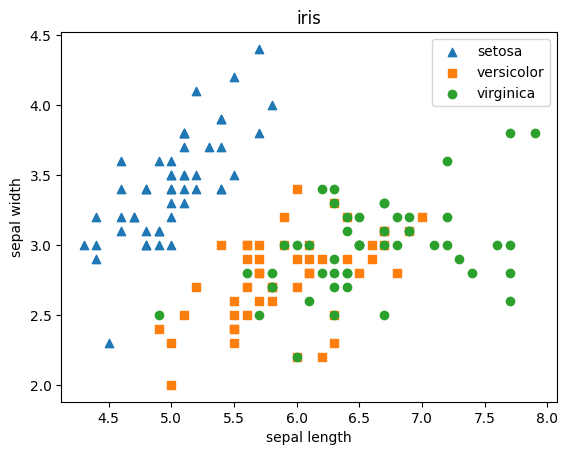

In [28]:
for i, marker in enumerate(['^', 's', 'o']):
    x_axis = iris_df[iris_df['target'] == i]['sepal length (cm)']
    y_axis = iris_df[iris_df['target'] == i]['sepal width (cm)']
    plt.scatter(x_axis, y_axis, marker=marker, label=load_iris()['target_names'][i])
plt.legend()
plt.title("iris")
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.show()

In [29]:
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
iris_df_scale = StandardScaler().fit_transform(iris_df)

In [ ]:
pca = PCA(n_components=2)
pca.fit(iris_df_scale)
iris_pca = pca.transform(iris_df_scale)

In [ ]:
iris_df2 =pd.concat([iris_df,pd.DataFrame(iris_pca)], axis=1).rename(columns={0:'pca1', 1:'pca2'})

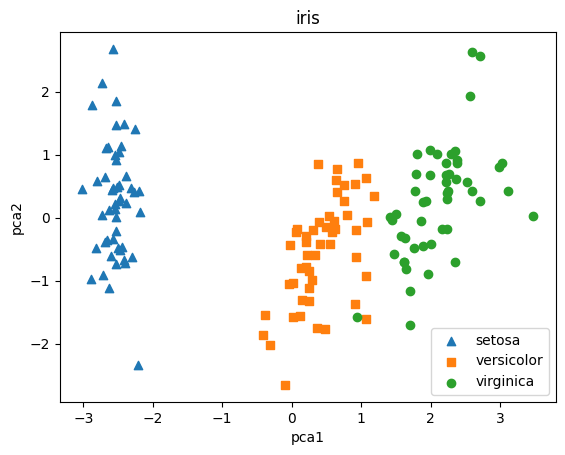

In [38]:
for i, marker in enumerate(['^', 's', 'o']):
    x_axis = iris_df2[iris_df2['target'] == i]['pca1']
    y_axis = iris_df2[iris_df2['target'] == i]['pca2']
    plt.scatter(x_axis, y_axis, marker=marker, label=load_iris()['target_names'][i])
plt.legend()
plt.title("iris")
plt.xlabel("pca1")
plt.ylabel("pca2")
plt.show()

In [39]:
pca.explained_variance_

array([3.8627697, 0.9202715])

In [41]:
pca.explained_variance_ratio_.sum()

np.float64(0.9502308529408711)

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
rcf = RandomForestClassifier(random_state=42)

In [44]:
return_pca = cross_val_score(rcf,iris_df2[['pca1','pca2']], iris_df2['target'], scoring='accuracy', cv=3)

In [45]:
return_pca

array([0.98, 0.98, 1.  ])

In [46]:
pwd

'/home/play/workspace'

In [63]:
col = pd.read_csv("./data/human_activity/features.txt", sep='\s+', header=None)[1].values.tolist()

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_1816172/3227228845.py:1: SyntaxWarning: invalid escape sequence '\s'
  col = pd.read_csv("./data/human_activity/features.txt", sep='\s+', header=None)[1].values.tolist()


In [68]:
import warnings
warnings.filterwarnings('ignore')

In [69]:
df = pd.read_csv("./data/human_activity/train/X_train.txt", header=None, sep='\s+')
df.columns = col


In [73]:
df.shape

(7352, 561)

In [79]:
y = pd.read_csv("./data/human_activity/train/y_train.txt", header=None).rename(columns={0:'target'})

In [94]:
pca_10 = PCA(n_components=10)
df_pca_10 = pca_10.fit_transform(df)

In [95]:
pca_10.explained_variance_ratio_.sum()

np.float64(0.8050387180555184)

In [96]:
rf = RandomForestClassifier(random_state=42)

In [97]:
rf.fit(df_pca_10, y)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [99]:
test = pd.read_csv("./data/human_activity/test/X_test.txt", header=None, sep='\s+')
y = pd.read_csv("./data/human_activity/test/y_test.txt", header=None).rename(columns={0:'target'})

In [100]:
pac_10_test = pca_10.transform(test)

In [102]:
from sklearn.metrics import accuracy_score


In [104]:
accuracy_score(y, rf.predict(pac_10_test))

0.8646080760095012

In [105]:
train_x = pd.read_csv("./data/human_activity/train/X_train.txt", header=None, sep='\s+')
train_y = pd.read_csv("./data/human_activity/train/y_train.txt", header=None).rename(columns={0:'target'})

In [118]:
rf_origin = RandomForestClassifier(random_state=42)
rf_origin.fit(train_x, train_y)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [123]:
rf_origin.feature_importances_.__len__()

561

In [120]:
test_x = pd.read_csv("./data/human_activity/test/X_test.txt", header=None, sep='\s+')
test_y = pd.read_csv("./data/human_activity/test/y_test.txt", header=None).rename(columns={0:'target'})

In [121]:
accuracy_score(test_y, rf_origin.predict(test_x))

0.9256871394638616

In [110]:
train_x = pd.read_csv("./data/human_activity/train/X_train.txt", header=None, sep='\s+')
train_y = pd.read_csv("./data/human_activity/train/y_train.txt", header=None).rename(columns={0:'target'})
test_x = pd.read_csv("./data/human_activity/test/X_test.txt", header=None, sep='\s+')
test_y = pd.read_csv("./data/human_activity/test/y_test.txt", header=None).rename(columns={0:'target'})
for x in range(10, 30, 5):
    pca_10 = PCA(n_components=x)
    train_x_pca = pca_10.fit_transform(train_x)
    rf_origin = RandomForestClassifier(random_state=42)
    rf_origin.fit(train_x_pca, train_y)
    test_x_pca = pca_10.transform(test_x)
    print(f"{x} -->", end=" ")
    print(accuracy_score(test_y, rf_origin.predict(test_x_pca)))


10 --> 0.8646080760095012
15 --> 0.8788598574821853
20 --> 0.8822531387852053
25 --> 0.8900576857821514
